In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T130936Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bef2da599225ed7316c471b5977377be00450ba464703e7b15357bb73e2c027e1e4c09c39b6919bde49bb1f4f4a8e95ebab9b77266472ae63c98064f3419389bc56125d39061c17939286f218b4ced62f5a030e6551abd3ddc3158323198e573054654789dab8c82aa21c86863220779b3d31cf1e674aec768aea3a70bcf1d8b1d18045851857f71af6189966e5f4f511d020dd9c757280f93da5f064c2f333a9724f4257523d941945a457890e2037ee5e2d5a0fe8ef8603a693dd4bc5cd14635b33223ab017ece8bc54509b90becda9c85374d000664b783216d36e683026afff6851894add6c89a4ebf3bdefcb149c0bbea2b00b8248759ae480c0da2235'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 16054568 bytes downloaded
Downloaded and uncompressed: digit-recognizer
Data source import complete.


# PyTorch Basics

- Notebook for demonstrating key attributes of PyTorch
- Sources:

https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
https://pytorch.org/docs/stable/index.html

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/digit-recognizer"))

# Any results you write to the current directory are saved as output.

import torch

['train.csv', 'test.csv', 'sample_submission.csv']


### Matrices in PyTorch

- Attributes (type and shape)
- Creating special matrices
- Conversion with numpy
- Matrix operations


In [ ]:
tensor = torch.Tensor([[1,2,4], [4,5,6]])
print(f"Type: {tensor.type}")
print(f"Shape: {tensor.shape}")
print(tensor)

print(torch.ones((2,3)))
print(torch.rand(2,3))

Type: <built-in method type of Tensor object at 0x7dee0ed956c0>
Shape: torch.Size([2, 3])
tensor([[1., 2., 4.],
        [4., 5., 6.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.6756, 0.5782, 0.8665],
        [0.7262, 0.9388, 0.3951]])


In [ ]:
arr = np.random.rand(2,3)
from_np_to_tensor = torch.from_numpy(arr)
from_tensor_to_np = from_np_to_tensor.numpy()

print(from_np_to_tensor)
print(from_tensor_to_np)

tensor([[0.1611, 0.2296, 0.5079],
        [0.9144, 0.4488, 0.8628]], dtype=torch.float64)
[[0.16113062 0.22960765 0.5079016 ]
 [0.91439114 0.44881824 0.86284283]]


In [ ]:
# create tensor
tensor = torch.rand(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
print("Mean: {}".format(tensor.mean()))

# Standard deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[0.6960, 0.9878, 0.3687],
        [0.0860, 0.4685, 0.3368],
        [0.0524, 0.8952, 0.6309]])
torch.Size([9])tensor([0.6960, 0.9878, 0.3687, 0.0860, 0.4685, 0.3368, 0.0524, 0.8952, 0.6309])

Addition: tensor([[1.3919, 1.9757, 0.7374],
        [0.1719, 0.9371, 0.6737],
        [0.1049, 1.7903, 1.2619]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[0.4844, 0.9758, 0.1359],
        [0.0074, 0.2195, 0.1135],
        [0.0028, 0.8013, 0.3981]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 0.5024856925010681
std: 0.3290557265281677


### Gradients in PyTorch

- Tensors can accumulate gradients from backpropagation

In [ ]:
x = torch.tensor([2., 3.], requires_grad=True)
y = x**3
print("y = ", y)

s = sum(y)
s.backward()
print("gradients: ", x.grad)
print("3x squared: ", 3*x**2)


y =  tensor([ 8., 27.], grad_fn=<PowBackward0>)
gradients:  tensor([12., 27.])
3x squared:  tensor([12., 27.], grad_fn=<MulBackward0>)


### Linear Regression

- Use tensors, loss function, gradients and optimizer to fit data

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])


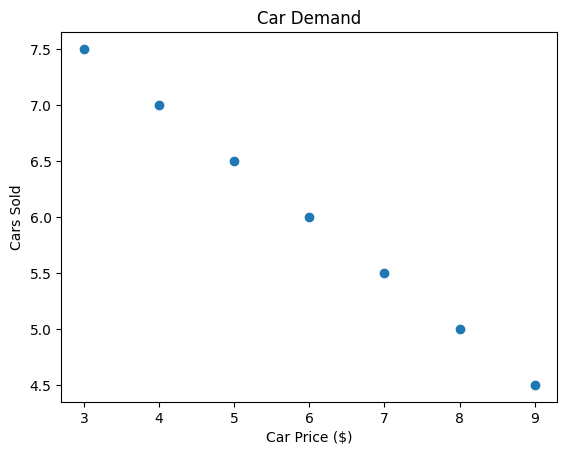

In [ ]:
car_prices = np.linspace(3, 9, 7)
car_prices = torch.tensor(car_prices, dtype=torch.float32).view(-1, 1)
print(car_prices)

car_sales = np.linspace(7.5, 4.5, 7)
car_sales = torch.tensor(car_sales, dtype=torch.float32).view(-1, 1)
print(car_sales)

plt.scatter(car_prices, car_sales)
plt.xlabel("Car Price ($)")
plt.ylabel("Cars Sold")
plt.title("Car Demand")
plt.show()


epoch 0, loss 7.7000837326049805
epoch 200, loss 1.5508263111114502
epoch 400, loss 0.3233602046966553
epoch 600, loss 0.06742345541715622
epoch 800, loss 0.014058278873562813
epoch 1000, loss 0.0029312260448932648


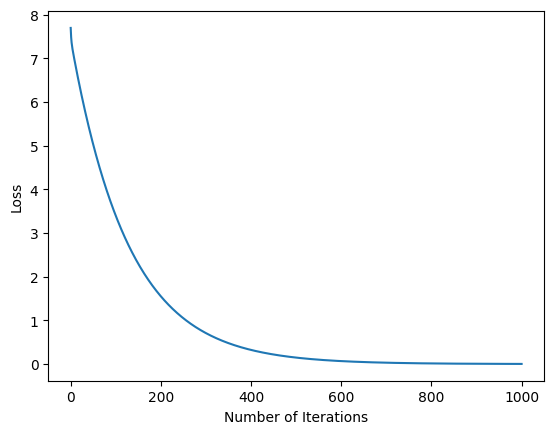

In [ ]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_dim):
        super().__init__()
        self.lin = nn.Linear(input_size, output_dim)

    def forward(self, x):
        return self.lin(x)

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

learning_rate = 2e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training
loss_list = []
preds = []
max_iters = 1001
for i in range(max_iters):
    optimizer.zero_grad()
    res = model(car_prices)
    loss = mse(res, car_sales)
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    # print loss
    if(i % 200 == 0):
        print(f"epoch {i}, loss {loss.item()}")
        preds.append(model(car_prices).detach().numpy())

plt.plot(range(max_iters),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

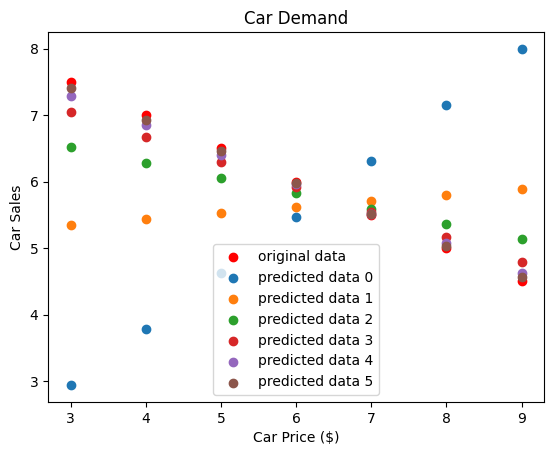

In [ ]:
plt.scatter(car_prices, car_sales,label = "original data",color ="red")
for i, pred in enumerate(preds):
    plt.scatter(car_prices, pred,label = "predicted data " + str(i))

plt.legend()
plt.xlabel("Car Price ($)")
plt.ylabel("Car Sales")
plt.title("Car Demand")
plt.show()

### Logistic Regression

- MNIST dataset
- Multiclass classification with linear layer and softmax output function

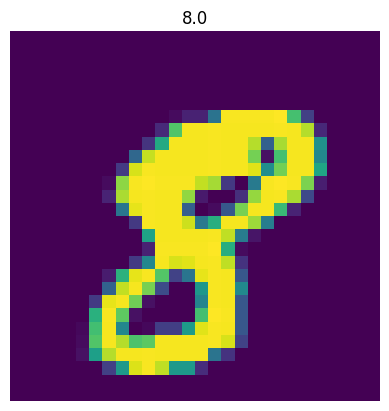

In [ ]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

train = pd.read_csv(r"../input/digit-recognizer/train.csv", dtype=np.float32)
targets = train.label.values
features = train.loc[:, train.columns != "label"].values / 255 # Normalized

features_train, features_test, targets_train, targets_test = train_test_split(features,
                                                                              targets,
                                                                              test_size=0.2,
                                                                              random_state=42)

batch_size = 100
max_iters = 10000
num_epochs = int(max_iters / (len(features_train) / batch_size))

train = torch.utils.data.TensorDataset(torch.tensor(features_train), torch.tensor(targets_train).type(torch.LongTensor))
test = torch.utils.data.TensorDataset(torch.tensor(features_test), torch.tensor(targets_test).type(torch.LongTensor))

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# Visualize an example
plt.imshow(features[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def train_model(model, learning_rate, input_size):
    print("Running on device: ", device)
    m = model.to(device)

    error = nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

    count = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            x_train = images.view(input_size)
            x_train, labels = x_train.to(device), labels.to(device)
            optim.zero_grad()
            out = model(x_train)
            loss = error(out, labels)
            loss.backward()
            optim.step()
            count +=1

            if count % 50 == 0:
                correct = 0
                total = 0
                with torch.no_grad():
                    model.eval()
                    for images, labels in test_loader:
                        x_test = images.view(input_size)
                        x_test, labels = x_test.to(device), labels.to(device)
                        out = model(x_test)
                        preds = torch.max(out, 1)[1]
                        total += len(labels)
                        correct += torch.sum(preds == labels)
                        accuracy = 100 * correct / total
                loss_list.append(loss.item())
                iteration_list.append(count)
                accuracy_list.append(accuracy.item())
                model.train()

            if count % 500 == 0:
                print(f"Count: {count}, Loss: {loss.item()}, Accuracy: {accuracy}")

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(iteration_list, loss_list, 'r-')
    ax2.plot(iteration_list, accuracy_list, 'b-')

    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax2.set_ylabel("Accuracy")
    plt.show()

Running on device:  cuda
Count: 500, Loss: 0.5845784544944763, Accuracy: 85.88095092773438
Count: 1000, Loss: 0.5448253750801086, Accuracy: 87.35713958740234
Count: 1500, Loss: 0.3208443522453308, Accuracy: 88.41666412353516
Count: 2000, Loss: 0.4063235819339752, Accuracy: 88.86904907226562
Count: 2500, Loss: 0.39420831203460693, Accuracy: 89.29761505126953
Count: 3000, Loss: 0.1946798712015152, Accuracy: 89.46428680419922
Count: 3500, Loss: 0.3467377722263336, Accuracy: 89.79761505126953
Count: 4000, Loss: 0.18993312120437622, Accuracy: 89.82142639160156
Count: 4500, Loss: 0.5625312924385071, Accuracy: 90.14285278320312
Count: 5000, Loss: 0.2846260964870453, Accuracy: 90.04761505126953
Count: 5500, Loss: 0.3407880663871765, Accuracy: 90.44047546386719
Count: 6000, Loss: 0.44725731015205383, Accuracy: 90.3452377319336
Count: 6500, Loss: 0.24211066961288452, Accuracy: 90.52381134033203
Count: 7000, Loss: 0.3451491892337799, Accuracy: 90.58333587646484
Count: 7500, Loss: 0.27108776569366

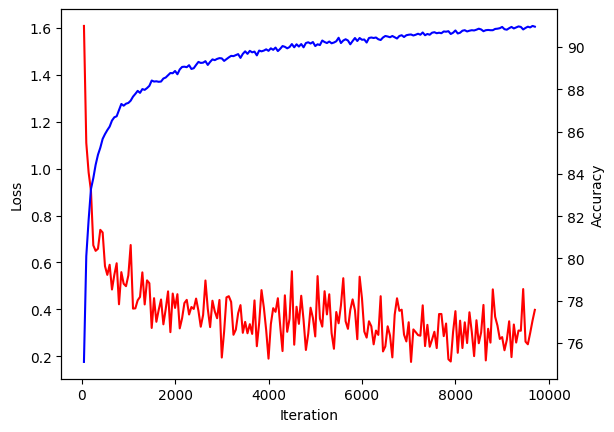

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_dim):
        super().__init__()
        # Note, logistic/softmax function is in the loss calculation
        self.lin = nn.Linear(input_size, output_dim)

    def forward(self, x):
        return self.lin(x)

input_dim = 28 * 28
input_size = (-1, input_dim) # batch x 28 x 28 pixels
output_dim = 10 # Digits 0-9
learning_rate = 2e-2

model = LogisticRegression(input_dim, output_dim)
train_model(model, learning_rate, input_size)


### Artificial Neural Network

- Three hidden layers with different activation functions

Running on device:  cuda
Count: 500, Loss: 0.72057044506073, Accuracy: 80.22618865966797
Count: 1000, Loss: 0.4688517451286316, Accuracy: 87.54761505126953
Count: 1500, Loss: 0.22292207181453705, Accuracy: 89.64285278320312
Count: 2000, Loss: 0.28210827708244324, Accuracy: 90.85713958740234
Count: 2500, Loss: 0.2991800904273987, Accuracy: 92.10713958740234
Count: 3000, Loss: 0.12669605016708374, Accuracy: 92.83333587646484
Count: 3500, Loss: 0.25863999128341675, Accuracy: 93.73809051513672
Count: 4000, Loss: 0.06022198498249054, Accuracy: 94.1547622680664
Count: 4500, Loss: 0.3090510368347168, Accuracy: 94.53571319580078
Count: 5000, Loss: 0.10907669365406036, Accuracy: 94.76190185546875
Count: 5500, Loss: 0.19950033724308014, Accuracy: 94.95237731933594
Count: 6000, Loss: 0.21102149784564972, Accuracy: 95.0952377319336
Count: 6500, Loss: 0.09766718745231628, Accuracy: 95.51190185546875
Count: 7000, Loss: 0.1095040962100029, Accuracy: 95.69047546386719
Count: 7500, Loss: 0.124338187277

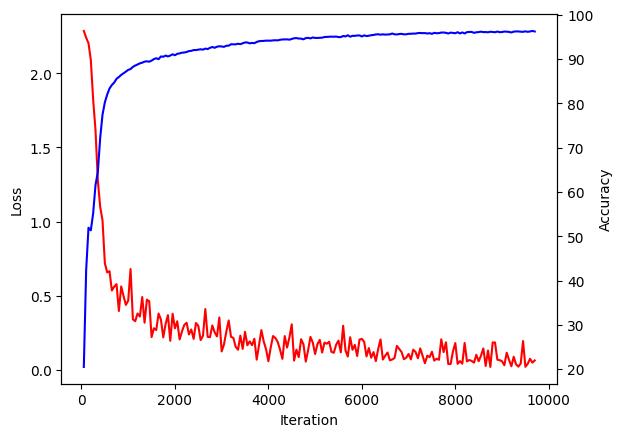

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

input_dim = 28 * 28
input_size = (-1, input_dim) # batch x 28 x 28 pixels
hidden_dim = 150
output_dim = 10
learning_rate = 2e-2

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
train_model(model, learning_rate, input_size)

### Convolutional Neural Network

- CNN with convolution, max pooling, and output layers

Running on device:  cuda
Count: 500, Loss: 0.27864906191825867, Accuracy: 91.80952453613281
Count: 1000, Loss: 0.12727031111717224, Accuracy: 95.01190185546875
Count: 1500, Loss: 0.0829838439822197, Accuracy: 95.97618865966797
Count: 2000, Loss: 0.08453430980443954, Accuracy: 96.32142639160156
Count: 2500, Loss: 0.12117861956357956, Accuracy: 96.9047622680664
Count: 3000, Loss: 0.06651727110147476, Accuracy: 97.35713958740234
Count: 3500, Loss: 0.06321859359741211, Accuracy: 97.29761505126953
Count: 4000, Loss: 0.008822869509458542, Accuracy: 97.70237731933594
Count: 4500, Loss: 0.09131912887096405, Accuracy: 97.76190185546875
Count: 5000, Loss: 0.025006603449583054, Accuracy: 97.70237731933594
Count: 5500, Loss: 0.12213580310344696, Accuracy: 98.03571319580078
Count: 6000, Loss: 0.14088663458824158, Accuracy: 97.69047546386719
Count: 6500, Loss: 0.07340821623802185, Accuracy: 98.11904907226562
Count: 7000, Loss: 0.04829090088605881, Accuracy: 98.14285278320312
Count: 7500, Loss: 0.055

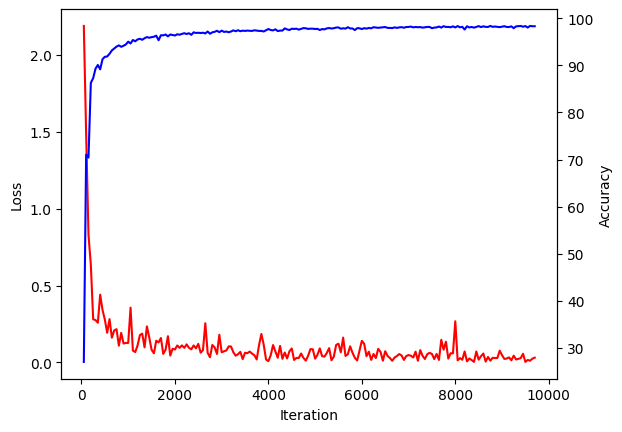

In [ ]:
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_net = nn.Sequential(
            # 28 x 28
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0),
            # 24 x 24
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # 12 x 12
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0),
            # 8 x 8
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            # 4 x 4
        )
        self.lin_out = nn.Linear(4 * 4 * 32, 10)

    def forward(self, x):
        out = self.conv_net(x)
        out = out.view(out.size(0), -1) # Keep the batch dimension in axis 0
        out = self.lin_out(out)
        return out

input_size = (batch_size, 1, 28, 28) # batch x 1 channel x 28 x 28 pixels
learning_rate = 2e-2
model = ConvolutionalNeuralNetwork()
train_model(model, learning_rate, input_size)

# 3 min on CPU CoLab. 1 min per 1000 iters
# 35 sec on TPU CoLab
# 15 sec on T4 GPU CoLab


### Recurrent Neural Network

- Build the RNN with basic PyTorch
- The RNN sequence is each row of pixels in the image

Running on device:  cuda
Count: 500, Loss: 2.2973270416259766, Accuracy: 12.619047164916992
Count: 1000, Loss: 2.281362771987915, Accuracy: 19.904762268066406
Count: 1500, Loss: 1.6019564867019653, Accuracy: 42.72618865966797
Count: 2000, Loss: 0.9263420104980469, Accuracy: 59.523807525634766
Count: 2500, Loss: 0.6674685478210449, Accuracy: 79.27381134033203
Count: 3000, Loss: 0.384194016456604, Accuracy: 85.92857360839844
Count: 3500, Loss: 0.46383675932884216, Accuracy: 86.33333587646484
Count: 4000, Loss: 0.3863323926925659, Accuracy: 88.27381134033203
Count: 4500, Loss: 0.46687763929367065, Accuracy: 90.92857360839844
Count: 5000, Loss: 0.32522130012512207, Accuracy: 90.04761505126953
Count: 5500, Loss: 0.2300155609846115, Accuracy: 92.82142639160156
Count: 6000, Loss: 0.24672918021678925, Accuracy: 94.22618865966797
Count: 6500, Loss: 0.06330979615449905, Accuracy: 94.78571319580078
Count: 7000, Loss: 0.18268056213855743, Accuracy: 94.8452377319336
Count: 7500, Loss: 0.17557097971

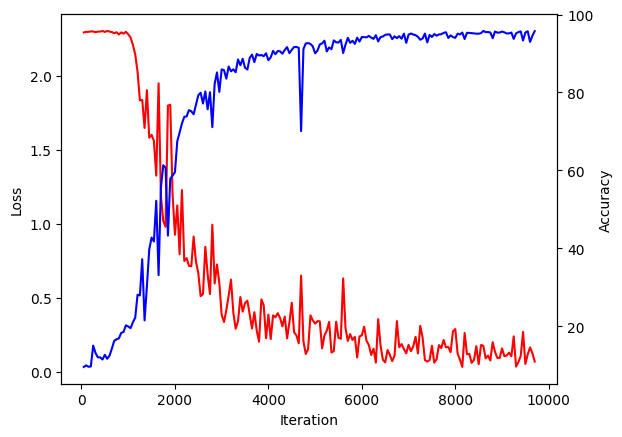

In [ ]:
class RecurrentNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_state_dim, output_dim):
        super().__init__()
        self.hidden_net = nn.Sequential(
            nn.Linear(input_dim + hidden_state_dim, hidden_state_dim),
            nn.ReLU(),
        )
        self.out_net = nn.Sequential(
            nn.Linear(hidden_state_dim, output_dim),
        )

    def forward(self, x):
        batch_dim, seq_len, _ = x.size()
        x = x.transpose(0,1)
        self.hidden_state = torch.zeros(batch_dim, hidden_state_dim).to(device)
        for s in range(seq_len):
            combined_in = torch.cat((x[s], self.hidden_state), 1)
            self.hidden_state = self.hidden_net(combined_in)
        out = self.out_net(self.hidden_state)
        return out

input_dim = 28
seq_dim = 28
input_size = (-1, seq_dim, input_dim)
hidden_dim = 20
hidden_state_dim = 100
output_dim = 10
learning_rate = 2e-2

model = RecurrentNeuralNetwork(input_dim, hidden_dim, hidden_state_dim, output_dim)
train_model(model, learning_rate, input_size)

### PyTorch Built-in RNN

- Use the existing PyTorch RNN component with 1 layer

Running on device:  cuda
Count: 500, Loss: 2.2953310012817383, Accuracy: 13.630951881408691
Count: 1000, Loss: 2.258000373840332, Accuracy: 20.261903762817383
Count: 1500, Loss: 1.3166232109069824, Accuracy: 64.30952453613281
Count: 2000, Loss: 0.720720648765564, Accuracy: 68.05952453613281
Count: 2500, Loss: 0.4479023218154907, Accuracy: 76.44047546386719
Count: 3000, Loss: 0.3039917051792145, Accuracy: 86.73809051513672
Count: 3500, Loss: 0.5440030097961426, Accuracy: 86.05952453613281
Count: 4000, Loss: 0.17103415727615356, Accuracy: 91.52381134033203
Count: 4500, Loss: 0.36344486474990845, Accuracy: 90.95237731933594
Count: 5000, Loss: 0.11752359569072723, Accuracy: 93.53571319580078
Count: 5500, Loss: 0.36219391226768494, Accuracy: 92.77381134033203
Count: 6000, Loss: 0.1957928091287613, Accuracy: 93.35713958740234
Count: 6500, Loss: 0.07126269489526749, Accuracy: 95.07142639160156
Count: 7000, Loss: 0.32409918308258057, Accuracy: 94.75
Count: 7500, Loss: 0.8724273443222046, Accur

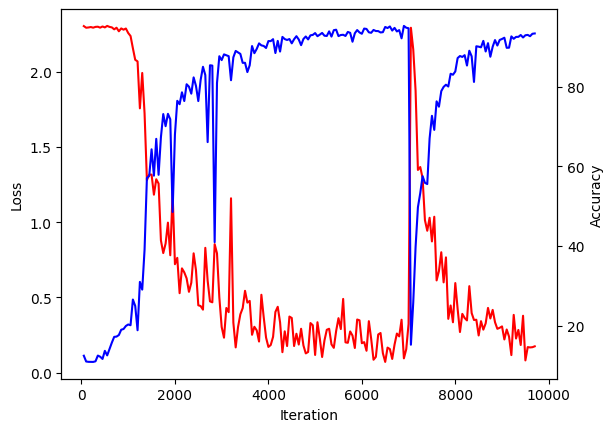

In [ ]:
class RNNTorch(nn.Module):
    def __init__(self, input_dim, hidden_state_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_state_dim = hidden_state_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(input_dim, hidden_state_dim, layer_dim, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_state_dim, output_dim)

    def forward(self, x):
        batch_dim, seq_dim, _ = x.size()
        h0 = torch.zeros(self.layer_dim, batch_dim, self.hidden_state_dim).to(device)
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1])
        return out

input_dim = 28
seq_dim = 28
input_size = (-1, seq_dim, input_dim)
hidden_state_dim = 100
layer_dim = 1
output_dim = 10
learning_rate = 2e-2

model = RNNTorch(input_dim, hidden_state_dim, layer_dim, output_dim)
train_model(model, learning_rate, input_size)

### LSTM with PyTorch

- Use basic PyTorch components to build LSTM

Running on device:  cuda
Count: 500, Loss: 2.298987627029419, Accuracy: 10.821428298950195
Count: 1000, Loss: 2.305911064147949, Accuracy: 11.15476131439209
Count: 1500, Loss: 2.297868013381958, Accuracy: 13.714285850524902
Count: 2000, Loss: 2.290733575820923, Accuracy: 16.738094329833984
Count: 2500, Loss: 2.269925117492676, Accuracy: 18.5
Count: 3000, Loss: 2.252410650253296, Accuracy: 19.0
Count: 3500, Loss: 2.2169671058654785, Accuracy: 19.452381134033203
Count: 4000, Loss: 2.1661298274993896, Accuracy: 22.7261905670166
Count: 4500, Loss: 1.999852180480957, Accuracy: 31.488094329833984
Count: 5000, Loss: 1.5652159452438354, Accuracy: 46.64285659790039
Count: 5500, Loss: 1.2243523597717285, Accuracy: 59.7023811340332
Count: 6000, Loss: 1.1701774597167969, Accuracy: 65.54761505126953
Count: 6500, Loss: 0.8052634596824646, Accuracy: 69.02381134033203
Count: 7000, Loss: 0.7616828083992004, Accuracy: 79.83333587646484
Count: 7500, Loss: 0.511201024055481, Accuracy: 85.4047622680664
Cou

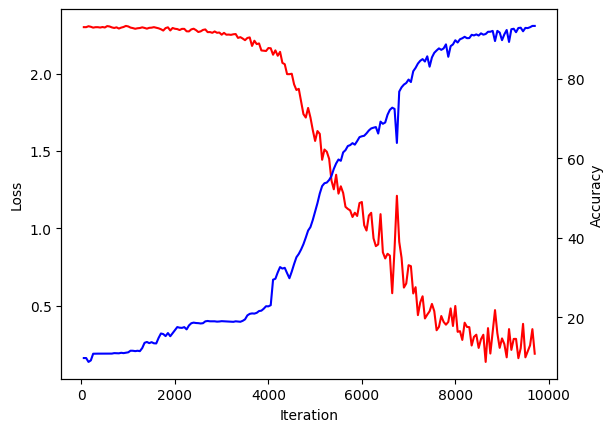

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_state_dim, cell_state_dim, output_dim):
        super().__init__()
        self. hidden_state_dim = hidden_state_dim
        self.cell_state_dim = cell_state_dim

        self.forget_gate_net = nn.Sequential(
            nn.Linear(input_dim + hidden_state_dim, cell_state_dim),
            nn.Sigmoid(),
        )
        self.in_gate_net1 = nn.Sequential(
            nn.Linear(input_dim + hidden_state_dim, cell_state_dim),
            nn.Tanh(),
        )
        self.in_gate_net2 = nn.Sequential(
            nn.Linear(input_dim + hidden_state_dim, cell_state_dim),
            nn.Sigmoid(),
        )
        self.out_gate_net = nn.Sequential(
            nn.Linear(input_dim + hidden_state_dim, hidden_state_dim),
            nn.Sigmoid(),
        )
        self.out_net = nn.Sequential(
            nn.Linear(hidden_state_dim, output_dim),
        )

    def forward(self, x):
        batch_dim, seq_len, _ = x.size()
        x = x.transpose(0,1)
        self.hidden_state = torch.zeros(batch_dim, self.hidden_state_dim).to(device)
        self.cell_state = torch.zeros(batch_dim, self.cell_state_dim).to(device)
        for s in range(seq_len):
            combined_in = torch.cat((x[s], self.hidden_state), 1)

            forget_gate = torch.mul(self.cell_state, self.forget_gate_net(combined_in))
            input_gate = torch.mul(self.in_gate_net1(combined_in), self.in_gate_net2(combined_in))
            self.cell_state = torch.add(forget_gate, input_gate)

            output_gate = self.out_gate_net(combined_in)
            self.hidden_state = torch.mul(output_gate, torch.tanh(self.cell_state))

        out = self.out_net(self.hidden_state)
        return out

input_dim = 28
seq_dim = 28
input_size = (-1, seq_dim, input_dim)
hidden_dim = 20
hidden_state_dim = 100
cell_state_dim = 100
output_dim = 10
learning_rate = 2e-2

model = LSTM(input_dim, hidden_state_dim, cell_state_dim, output_dim)
train_model(model, learning_rate, input_size)

### PyTorch Built-in LSTM

- Use the existing PyTorch LSTM component with 1 layer

Running on device:  cuda
Count: 500, Loss: 2.2900094985961914, Accuracy: 14.583333015441895
Count: 1000, Loss: 2.1463565826416016, Accuracy: 28.39285659790039
Count: 1500, Loss: 1.3419793844223022, Accuracy: 57.39285659790039
Count: 2000, Loss: 0.7674438953399658, Accuracy: 59.86904525756836
Count: 2500, Loss: 0.5022316575050354, Accuracy: 74.89285278320312
Count: 3000, Loss: 0.26088622212409973, Accuracy: 85.02381134033203
Count: 3500, Loss: 0.4800345301628113, Accuracy: 86.79761505126953
Count: 4000, Loss: 0.16860494017601013, Accuracy: 92.35713958740234
Count: 4500, Loss: 0.3282356560230255, Accuracy: 92.42857360839844
Count: 5000, Loss: 0.11744966357946396, Accuracy: 93.96428680419922
Count: 5500, Loss: 0.21747499704360962, Accuracy: 94.4047622680664
Count: 6000, Loss: 0.1858823448419571, Accuracy: 94.88095092773438
Count: 6500, Loss: 0.0752067044377327, Accuracy: 94.58333587646484
Count: 7000, Loss: 0.10913970321416855, Accuracy: 95.46428680419922
Count: 7500, Loss: 0.170292839407

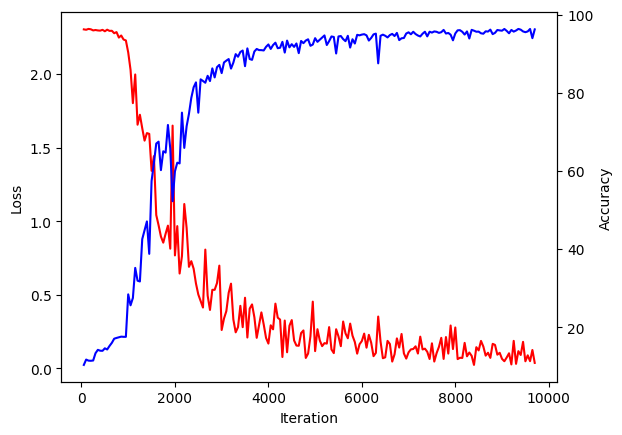

In [ ]:
class LSTMTorch(nn.Module):
    def __init__(self, input_dim, hidden_state_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_state_dim = hidden_state_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_state_dim, layer_dim, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_state_dim, output_dim)

    def forward(self, x):
        batch_dim, seq_dim, _ = x.size()
        h0 = torch.zeros(self.layer_dim, batch_dim, self.hidden_state_dim).to(device)
        c0 = torch.zeros(self.layer_dim, batch_dim, self.hidden_state_dim).to(device)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1])
        return out

input_dim = 28
seq_dim = 28
input_size = (-1, seq_dim, input_dim)
hidden_state_dim = 100
layer_dim = 1
output_dim = 10
learning_rate = 2e-2

model = RNNTorch(input_dim, hidden_state_dim, layer_dim, output_dim)
train_model(model, learning_rate, input_size)